<h1><center>Non-Intrusive Load Monitoring System for the Estimation of Household Appliance Power Consumption.</center></h1>

[Github_link!](https://github.com/ambigarnikhil/Non-Intrusive-Load-Monitoring-System-for-the-Estimation-of-Household-Appliance-Power-Consumption)

***

<p style="text-align:center;"> “Process of estimating the energy consumed by individual appliances given just a whole-house power meter reading”</p>

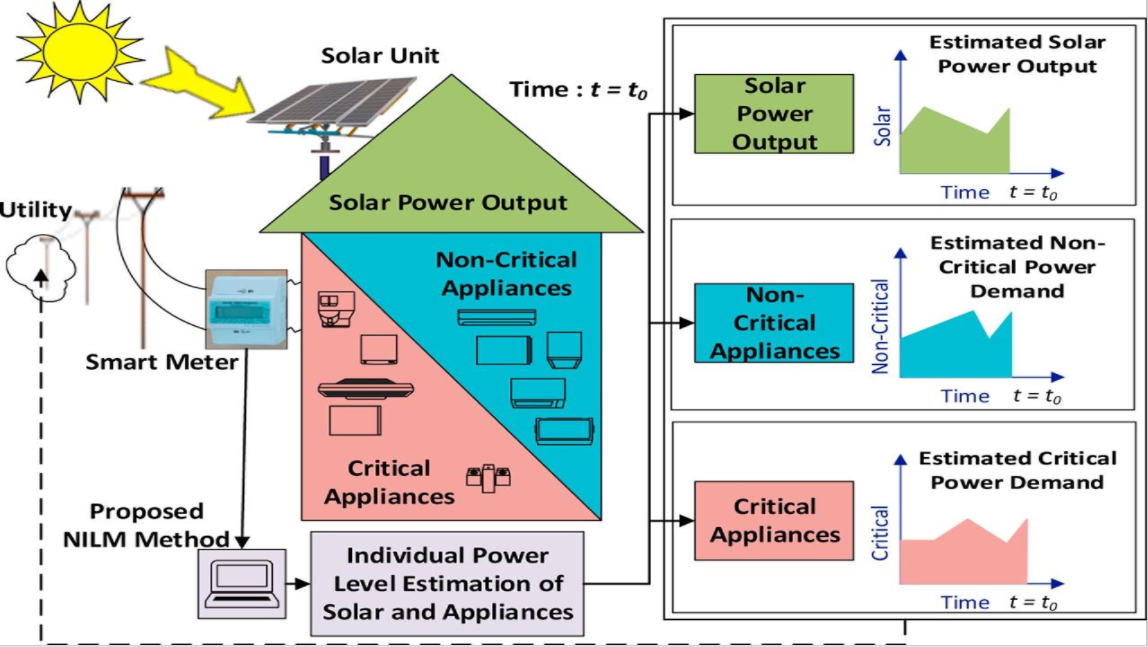

<span style="font-family:cursive;">NILM is a process of estimating the energy consumed by individual appliance. It requires only single meter per house. The data is acquired from the main electrical panel outside the building, hence considered to be non intrusive.                                                                                                                    In the above picture we can see that the smart meter is connected/fitted outside the house, through which power enters the house and the smart meter continuously capture/store the energy consumptiom data.                                                                                                                                                                                    The collected data then will be processed using some of the NILM algorithms to obtain the power consumed by each of the appliances. </span>

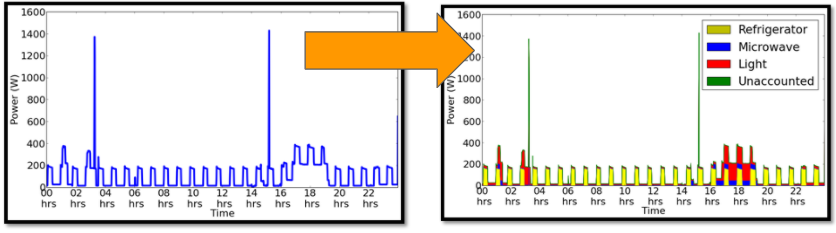

<span style="font-family:cursive;">In the left hand side graph we can see that the whole power meter reading of a house is given.                                 
By using NILM algorithms on left hand side data we get a right hand side graph in which we can note the energy consumption of all the individual appliance. Here we can notice the energy consumption by a refrigerator, microwave and light.</span>

***

# About the REDD dataset

<span style="font-family:cursive;"> 
The dataset directory contains average power readings for both the two power mains and the individual circuits of the house.   
The main directory consists of several 6 houses directories, each of which contain all the power readings for a single house.   
Each house subdirectory consists of a labels.dat and several channels_i.dat files. The labels file contains channel numbers and a text label indicating the general category of device on this channel.</span>

***

# Importing the Modules

<span style="font-family:cursive;"> 
Numpy(Numeric python) is imported as we are going to use numpy arrays.                                                       
Pandas is imported to convert the dataset into the dataframe.                                                                   
Matplotlib.pyplot is imported to plot the graphs.                                                                               
Datetime is imported for manipulating the dates and time.       
Glob module is imported as it is used to retrieve files/pathnames matching a specified pattern.                             Time module is used to calculate the time taken by a model for training </span>

In [1]:
import numpy as np                    
import pandas as pd                   
import matplotlib.pyplot as plt      
%matplotlib inline  
from IPython.display import display   
import datetime                       
import time   ##to calculate the time taken by a model for training.
import math
import warnings
warnings.filterwarnings("ignore")
import glob                           

***

# Reading House_1 data

<span style="font-family:cursive;"> Reading the label.dat file and renaming then and storing them into the dictionary.</span>

<span style="font-family:cursive;"> label.dat file contains the channel numbers and a text label indicating the type of the device as shown                         
1 mains                                                                                                                         
2 mains                                                                                                                         
3 oven                                                                                                                         
.                                                                                                                               
.                                                                                                                               
.                                                                                                                               
18 lighting                                                                                                                     
19 washer_dryer                                                                                                                 
20 washer_dryer                                                                                                                 
So I'm converting it in the form of mains_1, mains_2, oven_3,...,washer_dryer_20(this is basically done to get a better 
view and for better understanding).
The below snippet code will does this work.</span>

In [2]:
def read_label():
    label = {}
    hi = 'G:\low_freq.tar\low_freq\house_1/labels.dat'
    with open(hi) as f:
        for line in f:
            splitted_line = line.split(' ')
            label[int(splitted_line[0])] = splitted_line[1].strip() + '_' + splitted_line[0]
    return label
labels = read_label()
print('House 1: ', labels, '\n')

House 1:  {1: 'mains_1', 2: 'mains_2', 3: 'oven_3', 4: 'oven_4', 5: 'refrigerator_5', 6: 'dishwaser_6', 7: 'kitchen_outlets_7', 8: 'kitchen_outlets_8', 9: 'lighting_9', 10: 'washer_dryer_10', 11: 'microwave_11', 12: 'bathroom_gfi_12', 13: 'electric_heat_13', 14: 'stove_14', 15: 'kitchen_outlets_15', 16: 'kitchen_outlets_16', 17: 'lighting_17', 18: 'lighting_18', 19: 'washer_dryer_19', 20: 'washer_dryer_20'} 



<span style="font-family:cursive;"> Reading the data from channels{1..20} and converting it to dataframes.</span>

<span style="font-family:cursive;"> Each channel contains date, time in unix format and it also contains power values.                                             
So firstly we are reading the first channel data into the dataframe df.                                                           
Then by using for loop we are reading channel_2 to channel_n data and storing in the temporary dataframe.                         
In for loop we are reading the channel data into temporary dataframe i.e, data in our case and merging it with the first       
dataframe df on unix time condition(it is similar to sql inner joins based on unix time condition.)                               
Then we are creating new column named timestamp and storing the datetime in datetime64[s] dtype format.                         
Then we set the timestamp column as index.                                                                                     
Then finally we are dropping the unixtime and timestamp column.</span>


In [3]:
def read_merge_data(house):
    path = 'G:\low_freq.tar\low_freq/house_{}/'.format(house)
    file = path + 'channel_1.dat'
    df = pd.read_table(file, sep = ' ', names = ['unix_time', labels[1]], 
                                       dtype = {'unix_time': 'int64', labels[1]:'float64'}) 
    ## parameters- filepath, separator, column_names , datatypes for column_names.
    
    num_apps = 20   ## as we are having 20 channels in the house_1, so we are setting the number_of_appliances variable to 20.
    for i in range(2, num_apps + 1):
        file = path + 'channel_{}.dat'.format(i)
        data = pd.read_table(file, sep = ' ', names = ['unix_time', labels[i]], 
                                       dtype = {'unix_time': 'int64', labels[i]:'float64'})
        df = pd.merge(df, data, how = 'inner', on = 'unix_time')  ## similar to sql inner joins based on conditions. 
    df['timestamp'] = df['unix_time'].astype("datetime64[s]") ## converting unix_time dtype to  datetime64 dtype. 
    df = df.set_index(df['timestamp'].values)                ## we are setting timestamp as index
    df.drop(['unix_time','timestamp'], axis=1, inplace=True) ## as we setted timestamp as index we need to drop two columns i.e, unix_time and timestamp.
    return df
df = {}
df = read_merge_data(1)

***

# Printing the shape and first 3 rows of the dataframe.

In [4]:
print('House 1 data has shape: ', df.shape)  

House 1 data has shape:  (406748, 20)


In [5]:
df.head(3)  

,mains_1,mains_2,oven_3,oven_4,refrigerator_5,dishwaser_6,kitchen_outlets_7,kitchen_outlets_8,lighting_9,washer_dryer_10,microwave_11,bathroom_gfi_12,electric_heat_13,stove_14,kitchen_outlets_15,kitchen_outlets_16,lighting_17,lighting_18,washer_dryer_19,washer_dryer_20
2011-04-18 13:22:13,222.20,118.83,0.0,0.0,6.0,0.0,34.0,21.0,81.0,0.0,5.0,1.0,0.0,0.0,2.0,0.0,65.0,46.0,0.0,0.0
2011-04-18 13:22:16,223.17,119.19,0.0,0.0,6.0,0.0,34.0,21.0,81.0,0.0,5.0,1.0,0.0,0.0,2.0,0.0,65.0,46.0,0.0,0.0
2011-04-18 13:22:20,223.60,118.92,0.0,0.0,6.0,0.0,34.0,22.0,81.0,0.0,5.0,1.0,0.0,0.0,2.0,0.0,65.0,46.0,0.0,0.0


***

# Extracting all the dates from the dataset

<span style="font-family:cursive;"> Here, we are creating a empty dictonary named dates.                                                                           
As index values are in the dateTime format, the first 10 characters represent date and rest of the charaters represent time.   
So we are taking only the first 10 characters from all the indices and storing them into the dictonary and then we are sorting them in increasing order.                                                                                                       
And finally printing the total number of days, starting date and ending date.</span>

In [6]:
dates = {}
for i in range(1,2):
    dates[i] = [str(time)[:10] for time in df.index.values]
    dates[i] = sorted(list(set(dates[i])))
    print('House {0} data contain {1} days from {2} to {3}.'.format(i,len(dates[i]),dates[i][0], dates[i][-1]))
    print(dates[i], '\n')

House 1 data contain 23 days from 2011-04-18 to 2011-05-24.
['2011-04-18', '2011-04-19', '2011-04-20', '2011-04-21', '2011-04-22', '2011-04-23', '2011-04-24', '2011-04-25', '2011-04-26', '2011-04-27', '2011-04-28', '2011-04-30', '2011-05-01', '2011-05-02', '2011-05-03', '2011-05-06', '2011-05-07', '2011-05-11', '2011-05-12', '2011-05-13', '2011-05-22', '2011-05-23', '2011-05-24'] 



***

# Plotting the graph

<span style="font-family:cursive;">Here, we are plotting the graph for 18th april 2011 day data.                                                                   
Using df.loc[:dates[1][1]]  we are accessing the 2011-04-18 day data of all the channels.                                       
Then we are passing it as argument to plot_df function.                                                                         
In the function:                                                                                                               
First we are storing all the column names(channel names) in a list.                                                             
Then storing total number of channels into a variable named num_apps.                                                                 
Then creating subplots(10 rows,2 columns, figsize=(24,40)) 24 inch by 40 inch size.                                             
Then using for loop we are plotting graph for all the 20 channels using .plot() method.</span>                                                             


                     mains_1  mains_2  oven_3  oven_4  refrigerator_5  \
2011-04-18 13:22:13   222.20   118.83     0.0     0.0             6.0   
2011-04-18 13:22:16   223.17   119.19     0.0     0.0             6.0   
2011-04-18 13:22:20   223.60   118.92     0.0     0.0             6.0   
2011-04-18 13:22:23   222.91   119.16     0.0     0.0             6.0   
2011-04-18 13:22:26   222.94   118.83     0.0     0.0             6.0   
...                      ...      ...     ...     ...             ...   
2011-04-19 22:44:55   197.89   188.94     0.0     0.0             6.0   
2011-04-19 22:44:59   198.90   189.84     0.0     0.0             6.0   
2011-04-19 22:45:02   199.47   195.99     0.0     0.0             7.0   
2011-04-19 22:45:06   199.19   197.76     0.0     0.0             6.0   
2011-04-19 22:45:09   199.29   181.47     0.0     0.0             6.0   

                     dishwaser_6  kitchen_outlets_7  kitchen_outlets_8  \
2011-04-18 13:22:13          0.0               34

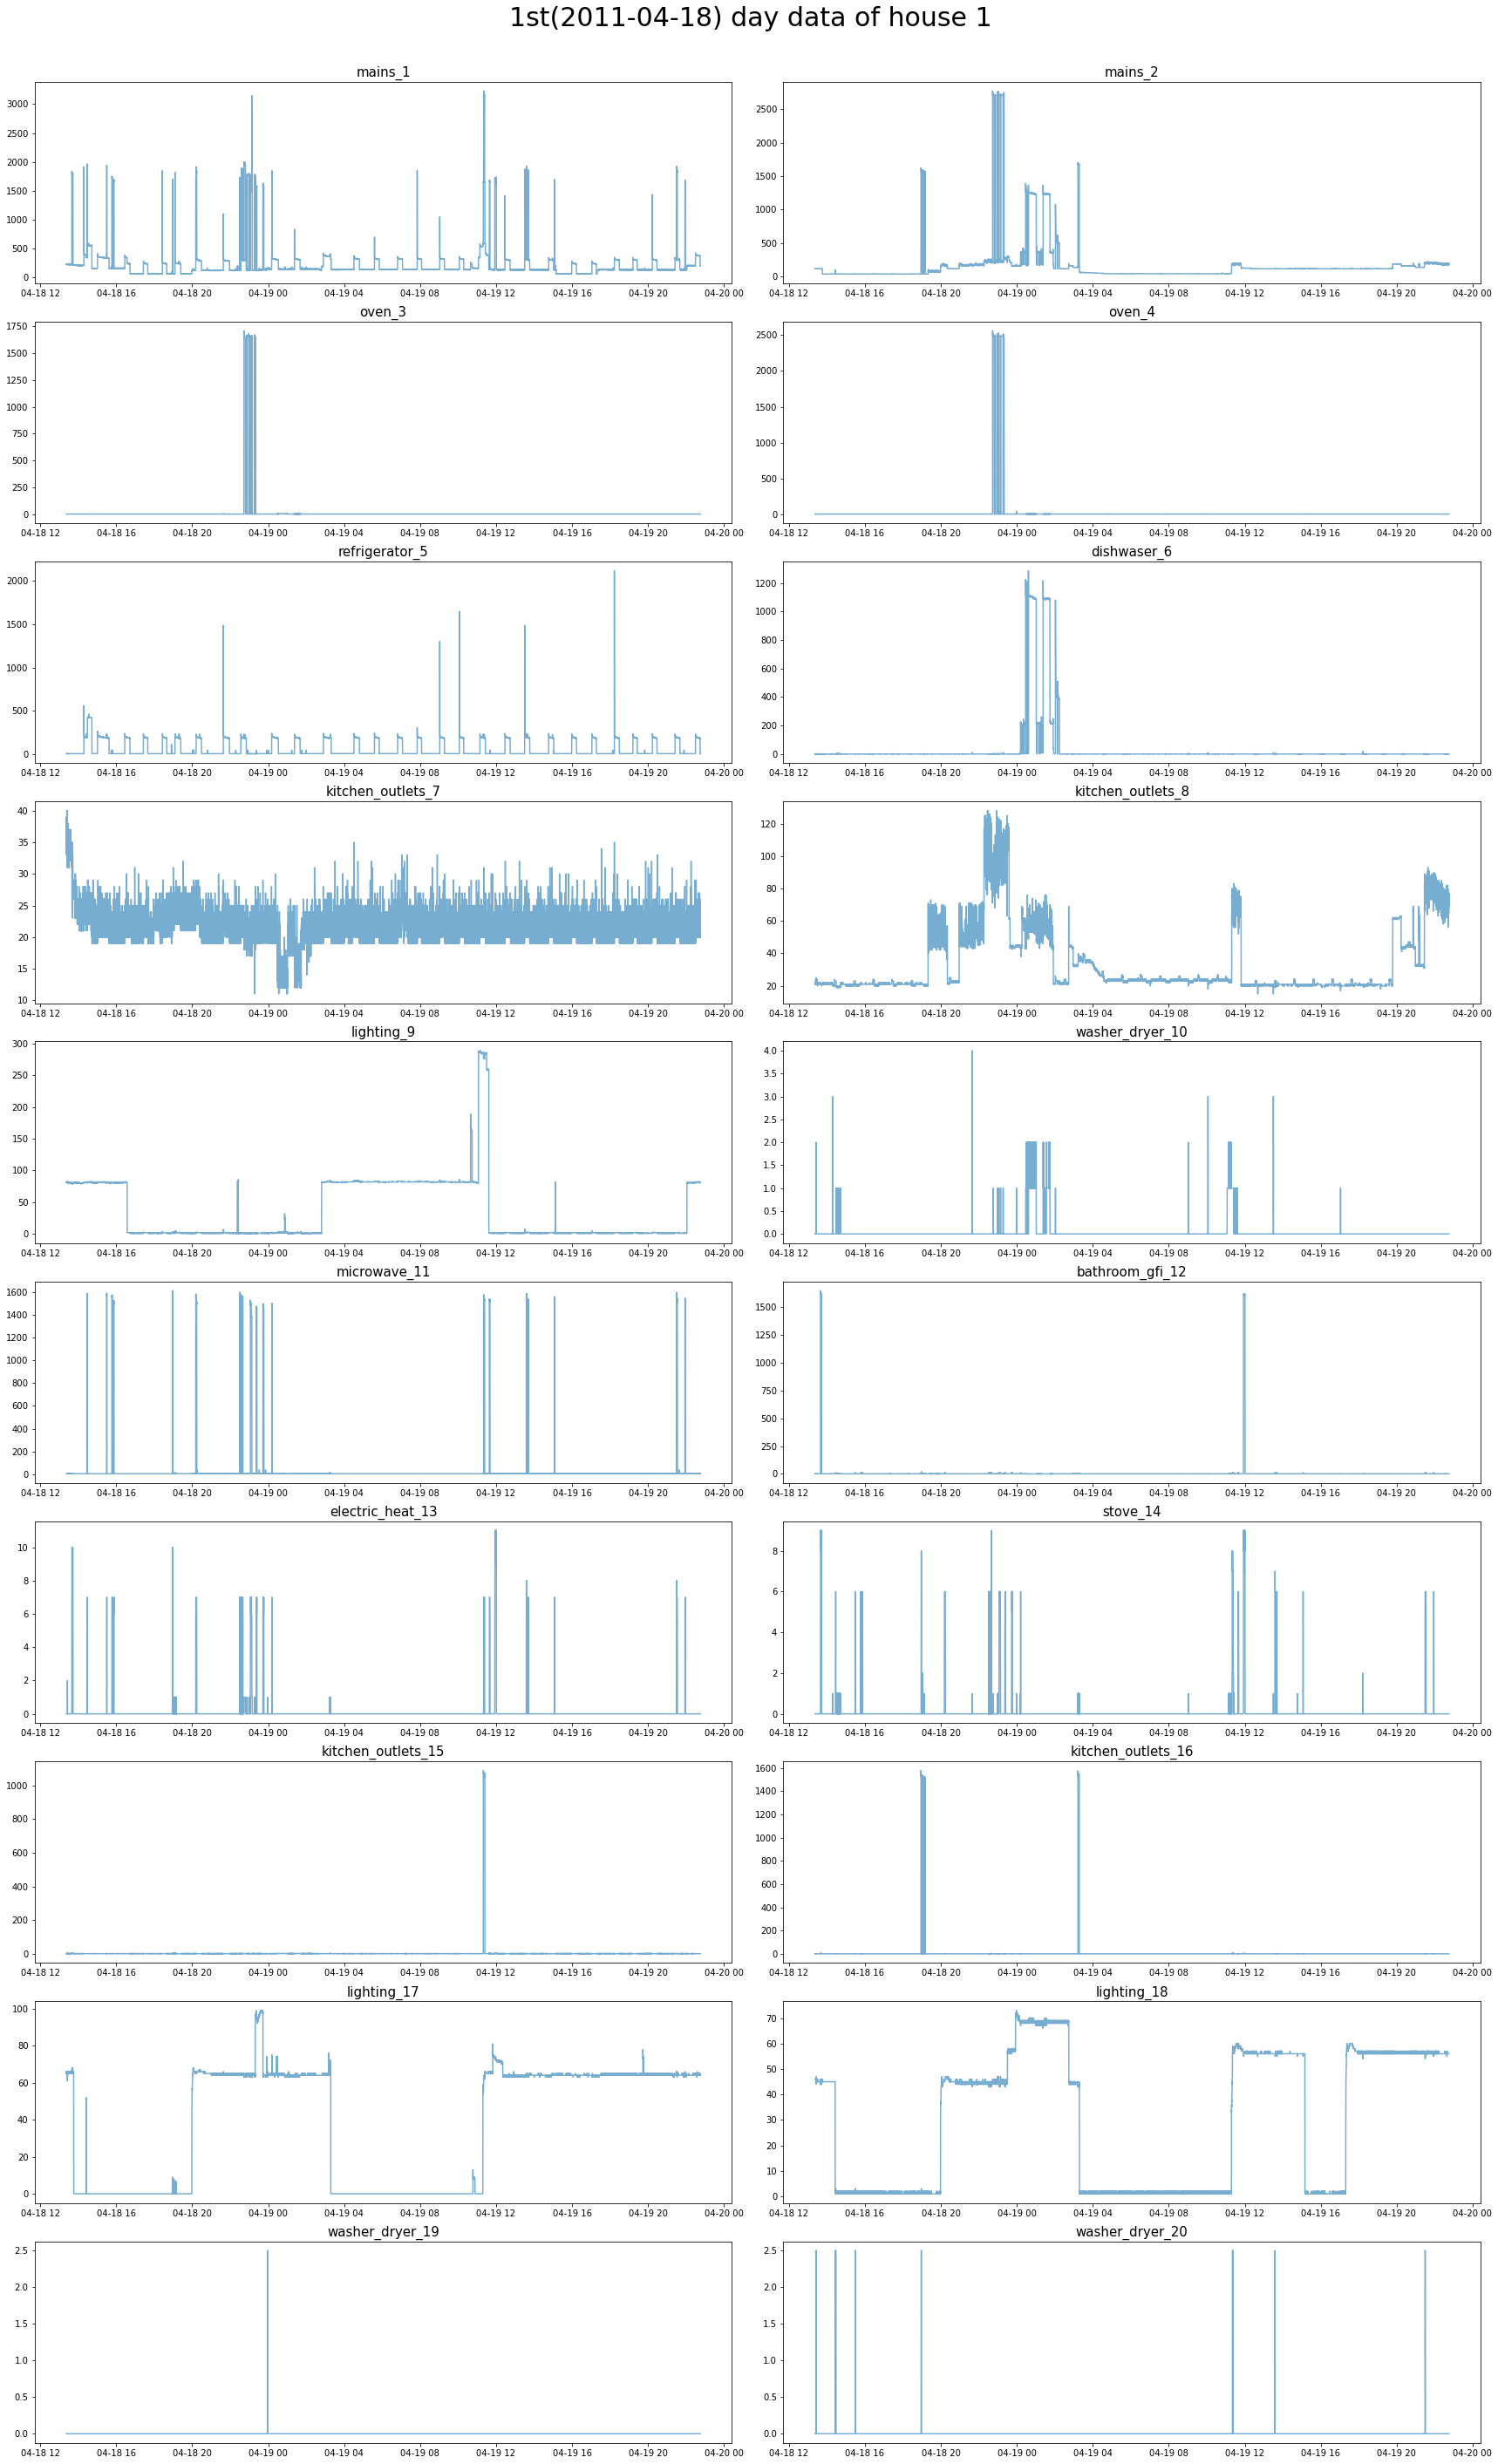

In [7]:
def plot_df(df, title):
    apps = df.columns.values
    print(apps)
    num_apps = len(apps) 
    print(num_apps)
    fig, axes = plt.subplots((num_apps+1)//2,2, figsize=(24, num_apps*2) )
    for i, key in enumerate(apps):
        axes.flat[i].plot(df[key], alpha = 0.6)
        axes.flat[i].set_title(key, fontsize = '15')
    plt.suptitle(title, fontsize = '30')
    fig.tight_layout()
    fig.subplots_adjust(top=0.95)

print(df.loc[:dates[1][1]]) ##accessing the 2011-04-18 day data of all the channels.
plot_df(df.loc[:dates[1][1]], '1st(2011-04-18) day data of house 1')

***

# Separate house_1 data into train, validation and test data

Basically we are dividing our dataset into three sets. And they are as follows:
1. Training set.
2. Validation set.
3. Test set. 

We are separating our data into train, validation, and test splits to prevent our model from overfitting and to accurately evaluate your model. The separation can be made in the ratio of <b>70:15:15</b>,  <b>80:10:10</b>, or <b>60:20:20</b>.

<b>Training set</b> is used to train and make the model learn the hidden features/patterns in the data.

<b>Validation set</b> is used to validate our model performance during training.

<b>Test set</b> is used to test the model after completing the training.
    

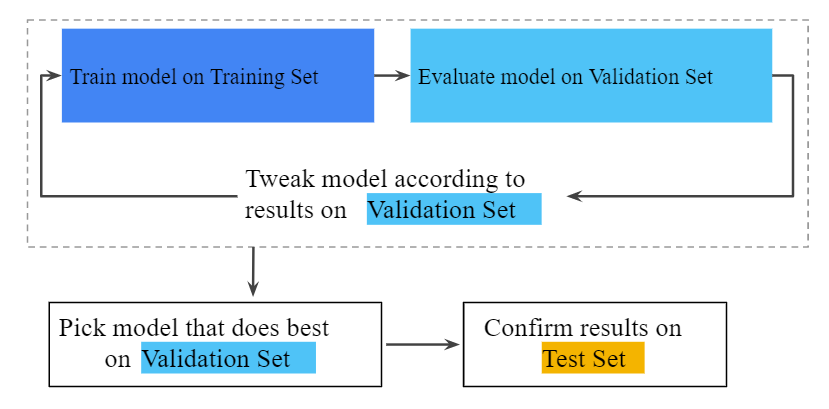

***

Data of the dates from <b>2011-04-18</b> to <b>2011-04-27</b> is used as training set.

Data of the dates from <b>2011-04-28</b> to <b>2011-05-06</b> is used as validation set.

Data of the dates from <b>2011-05-07</b> to <b>2011-05-24</b> is used as test set.

Below sinppet code does the separation of dataset and then we are printing the shapes of the train, validation and test sets.  

In [8]:
df1_train = df.loc[:dates[1][10]]
df1_val = df.loc[dates[1][11]:dates[1][16]]
df1_test = df.loc[dates[1][17]:]
print('df_train.shape: ', df1_train.shape)
print('df_val.shape: ', df1_val.shape)
print('df_test.shape: ', df1_test.shape)

df_train.shape:  (214816, 20)
df_val.shape:  (104875, 20)
df_test.shape:  (87057, 20)


***

We are using mains_1, mains_2 to predict the refrigerator values.

mains_1, mains_2 act as a dependent variables, refrigerator act as a independent variable.

In [9]:

X_train1 = df1_train[['mains_1','mains_2']].values
y_train1 = df1_train['refrigerator_5'].values
X_val1 = df1_val[['mains_1','mains_2']].values
y_val1 = df1_val['refrigerator_5'].values
X_test1 = df1_test[['mains_1','mains_2']].values
y_test1 = df1_test['refrigerator_5'].values
print(X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape)

(214816, 2) (214816,) (104875, 2) (104875,) (87057, 2) (87057,)


***

# Model Training: Decision Tree Regression

Mean Square Error it is taking two parameters predicted value and real value. 
(Mean of the, Summation of the squares of the predicted value-real value).

Mean Absolute Error it is taking two parameters predicted value and real value.(Mean of the, Summation of the absolute of the predicted value-real value).

Firstly, We are creating one array min_samples_split with values starting from **2** to **392** with step increase of **10**(2,12,22,...,382,392).                                                                                                         
Then, We are importing DecisionTreeRegressor from sklearn.tree

Then we are defining one function to train our model which takes X_train, y_train, X_val, y_val, and min_samples_split array as parameters.

In function, we are creating two lists named **"clfs"** & **"losses"**.                                                          
And declaring one variable named **start** and storing the starting time using time.time() method.                             
And then we are running for loop and traversing the min_samples_split array elements.                                                             
In every iteration the min_samples_split array value is passed as min_samples_split parameter to the DecisionTreeRegressor.     
**min_samples_split:The minimum number of samples required to split an internal node.**                                         
In each iteration we are creating one decisionTreeRegressor object named **clf** and training it using .fit() method. And then using the trained model we are predicting the values (here prediction is done on validation set) and we are also calculating the mean square error for the trained model. And finally, we are appending our trained model to the **clfs** list & MSE to the **losses** list.

At the end of our for loop we are printing the time taken to train the model.(present time using time.time() - start).          And finally we are returning both the **clfs** and the **losses** list.


In [10]:
def mse_loss(y_predict, y):
    return np.mean(np.square(y_predict - y)) 
def mae_loss(y_predict, y):
    return np.mean(np.abs(y_predict - y)) 

min_samples_split=np.arange(2, 400, 10)
from sklearn.tree import DecisionTreeRegressor
def tree_reg(X_train, y_train, X_val, y_val, min_samples_split):
    clfs = []
    losses = []
    start = time.time()
    for split in min_samples_split:
        clf = DecisionTreeRegressor(min_samples_split = split)
        clf.fit(X_train, y_train)
        y_predict_val = clf.predict(X_val)
        clfs.append(clf)
        losses.append( mse_loss(y_predict_val, y_val) )
    print('Trainning time: ', time.time() - start)
    return clfs, losses
tree_clfs_1, tree_losses_1 = tree_reg(X_train1, y_train1, X_val1, y_val1, min_samples_split)

Trainning time:  26.79906129837036


***

In below sinppet of code firstly, we are creating a variable named **ind** which stores the index of the minimum value from tree_losses_1 list. 

Then we are selecting the model present at that index.

And then we are predicting the values.(for prediction test set is used).

And then we are calculating **r2** & **MAE** and printing them.

In [11]:
ind = np.argmin(tree_losses_1)
tree_clf_1 = tree_clfs_1[ind]
y_test_predict_1 = tree_clf_1.predict(X_test1)
mae_tree_1 = mae_loss(y_test_predict_1, y_test1)
print('Mean absolute error on the test set: ', mae_tree_1)

Mean absolute error on the test set:  12.686127417077758


In [12]:
from sklearn.metrics import r2_score
print("r2_score:",r2_score(y_test1, y_test_predict_1))

r2_score: 0.8073993426477621


***

# Plotting the graph using both predicted values and real values

Below snippet of code plots the graph of 6 days data. 

We are creating a subplots with **6 rows** and **1 columns** and figsize=**24 inches/30 inches** .And we are adding centered suptitle to the plot. By using for loop we are plotting the graphs.


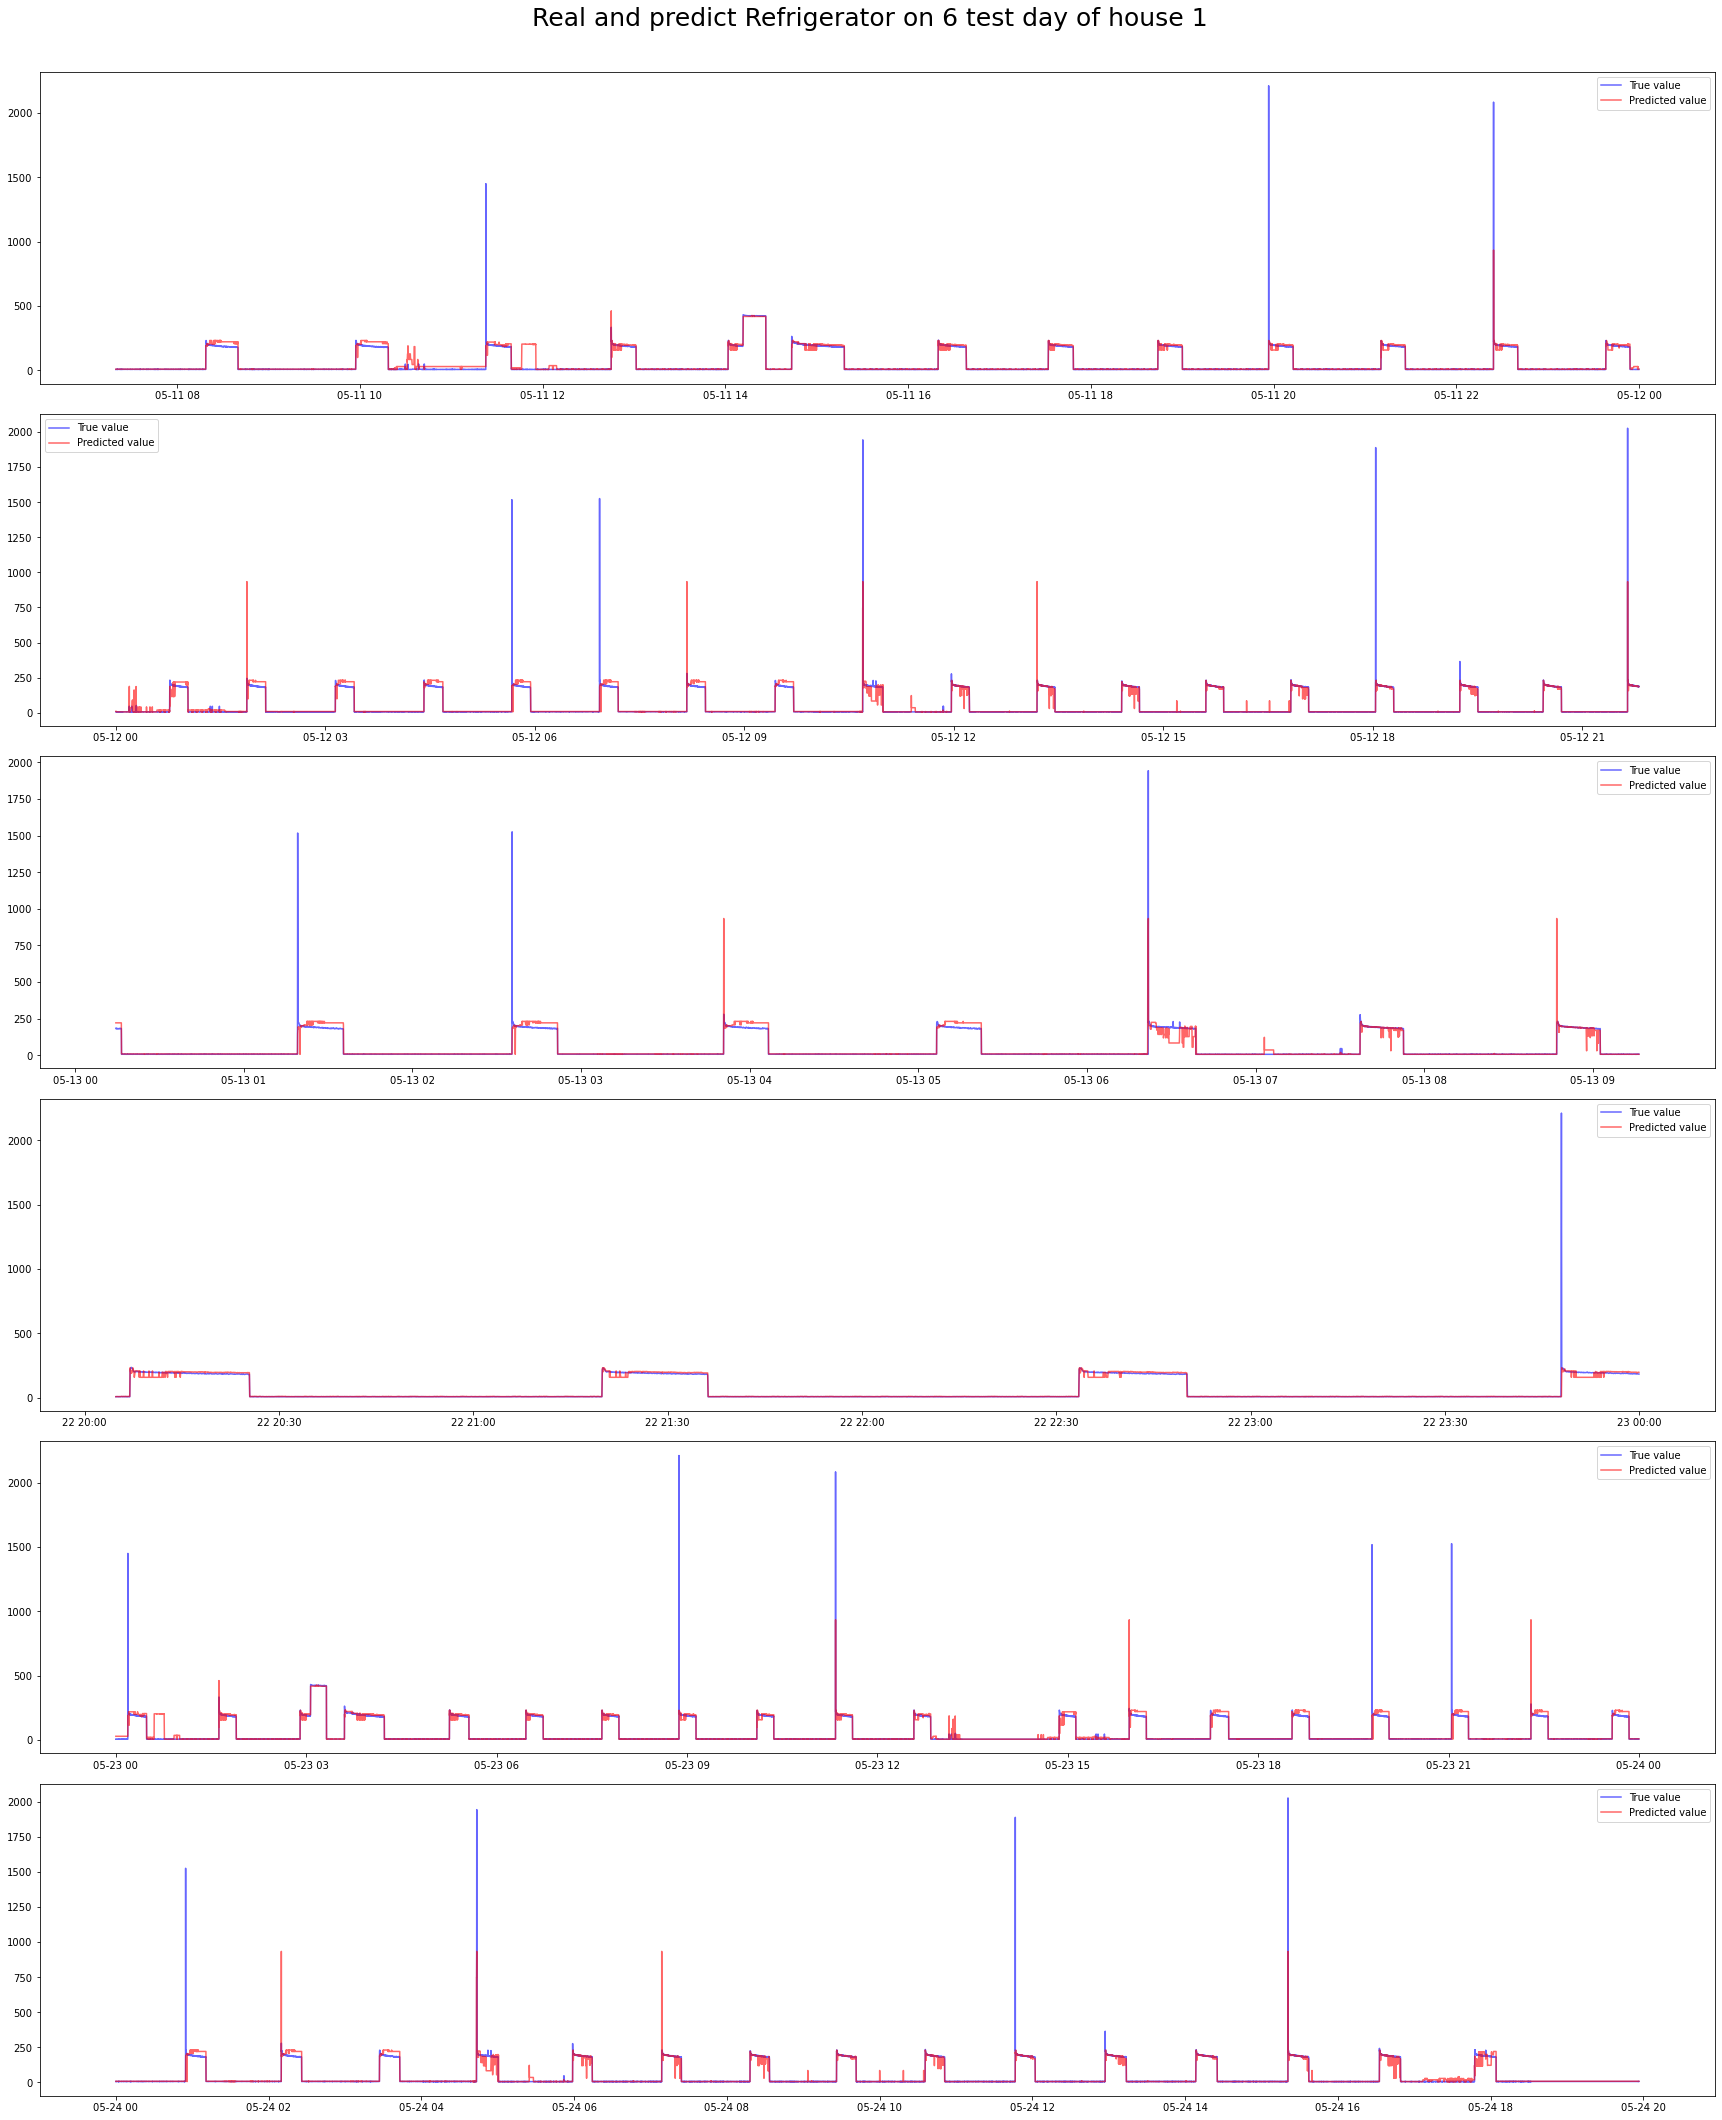

In [13]:
def plot_each_app(df, dates, predict, y_test, title, look_back = 0):
    num_date = len(dates)
    fig, axes = plt.subplots(num_date,1,figsize=(24, num_date*5) )
    plt.suptitle(title, fontsize = '25')
    fig.tight_layout()
    fig.subplots_adjust(top=0.95)
    for i in range(num_date):
        if i == 0: l = 0
        ind = df.loc[dates[i]].index[look_back:]
        axes.flat[i].plot(ind, y_test[l:l+len(ind)], color = 'blue', alpha = 0.6, label = 'True value')
        axes.flat[i].plot(ind, predict[l:l+len(ind)], color = 'red', alpha = 0.6, label = 'Predicted value')
        axes.flat[i].legend()
        l = len(ind)


plot_each_app(df1_test, dates[1][17:], y_test_predict_1, y_test1, 'Real and predict Refrigerator on 6 test day of house 1')

                                                    Thank you✨